<a href="https://colab.research.google.com/github/ssaannddeepp/Visualization-Matplotlib-Seaborn-/blob/main/Copy_of_Assignment3_Visualization_Matplotlib_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3: Visualization (Matplotlib & Seaborn)

Goal: Build insight-driven plots

Use the Titanic dataset or Iris dataset.


Q1. Create subplots for:

* Distribution of Age
* Count of Survived passengers by Gender
* Boxplot of Fare by Passenger Class





In [ ]:
# use Titanic dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Use Titanic dataset

import matplotlib.pyplot as plt
import seaborn as sns

#create a wide canvas

plt.figure(figsize=(18,5))


<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

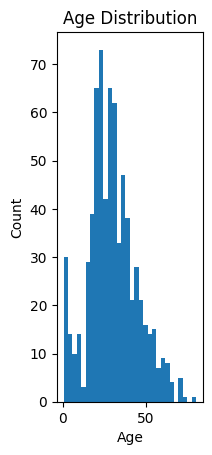

In [ ]:
plt.subplot(1,3,1)  # this means in one grid 1row, 3columns,1positions
plt.hist(df['Age'].dropna(),bins = 30) #used dropna(),bcoz this column contains too many null values,if we don't drop it then it will give error,wrong counts,broken visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Count of Survived passengers by Gender

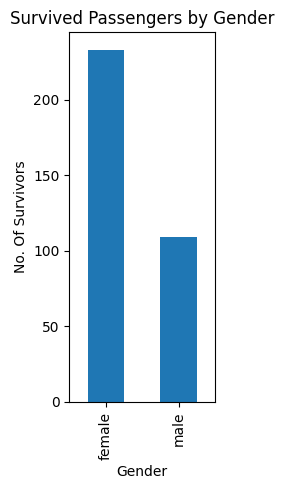

In [ ]:
# Count of Survived passengers by Gender
plt.subplot(1,3,2)
survival_gender = df.groupby('Sex')['Survived'].sum()
survival_gender.plot(kind = 'bar')
plt.title('Survived Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('No. Of Survivors')
plt.show()

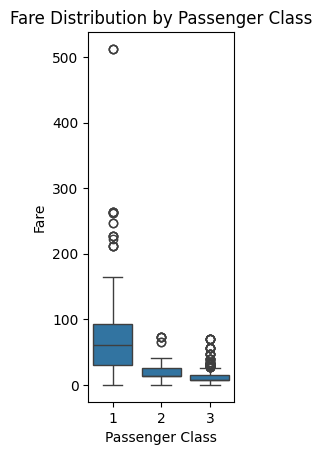

In [ ]:
# Boxplot of Fare by Passenger Class
plt.subplot(1,3,3)
sns.boxplot(x ='Pclass',y = 'Fare',data = df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

Q2. Create a Seaborn pairplot to show relationships between numeric features and add a hue for a
categorical variable (like gender/species).


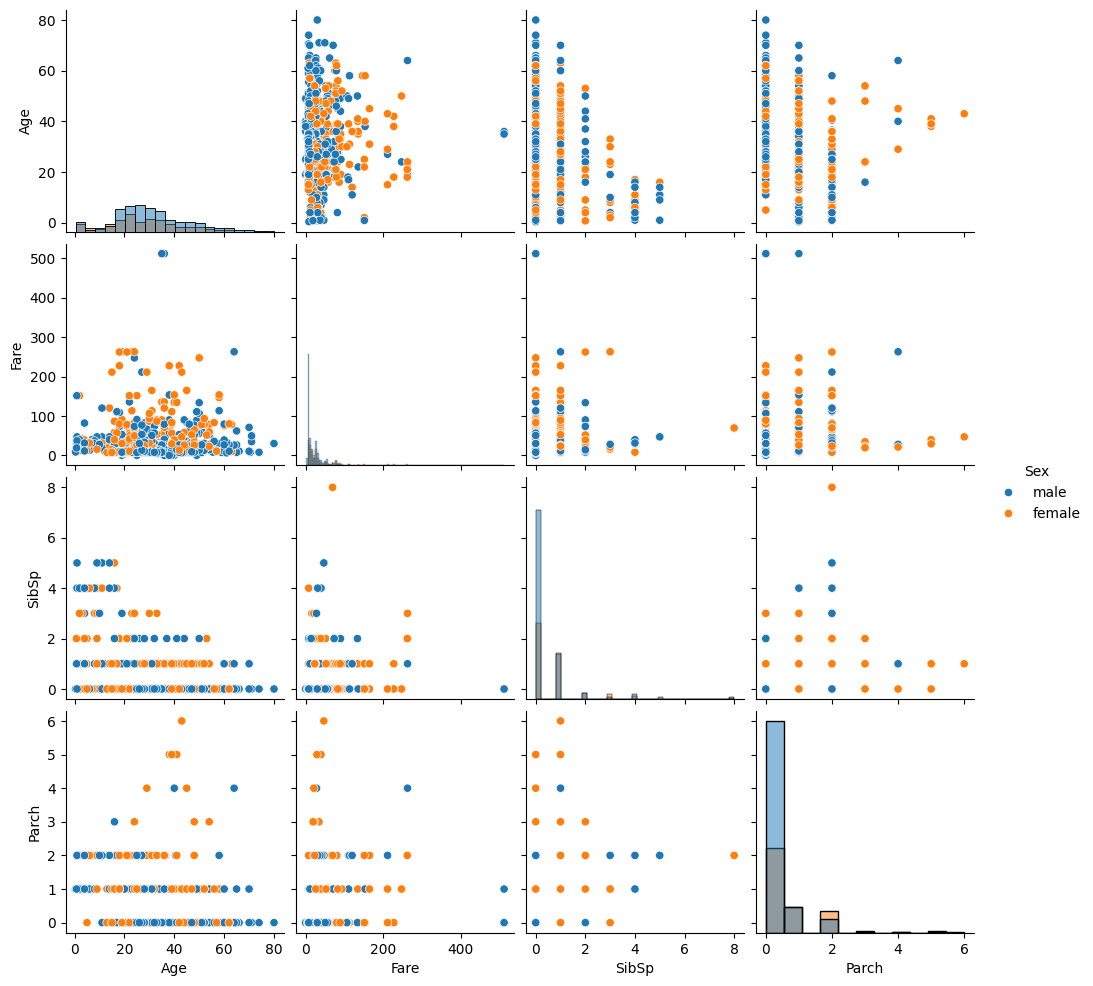

In [ ]:
sns.pairplot(
    df,
    vars=['Age','Fare','SibSp','Parch'],
    hue='Sex',
    diag_kind='hist'
)

plt.show()

Q3. Plot a correlation heatmap and highlight strong positive and negative correlations

In [ ]:
# firstly need to create a correlation matrix

corr_matrix =df.corr(numeric_only = True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


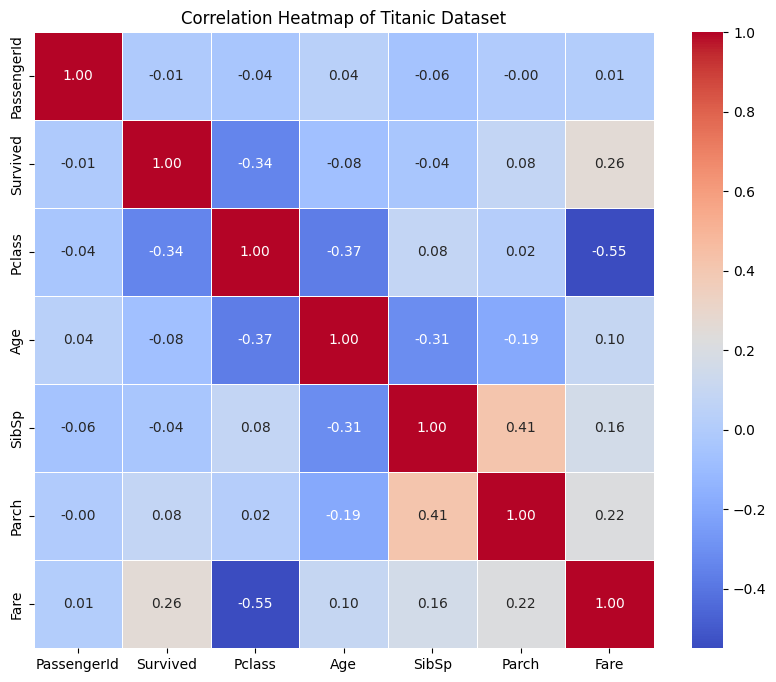

In [ ]:
# Plot a heatmap

plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt = '.2f'

)

plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [ ]:
# Check Strong corelations

strong_correlations = corr_matrix[
    (corr_matrix >= 0.7) | (corr_matrix <= -0.7)
]
strong_correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Q4. Create a bar plot comparing average fare per class and annotate values on top.


In [ ]:
avg_fare_per_class = df.groupby ('Pclass')['Fare'].mean().reset_index()  #reset_index(), for make it nice dataframe for plotting
avg_fare_per_class

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


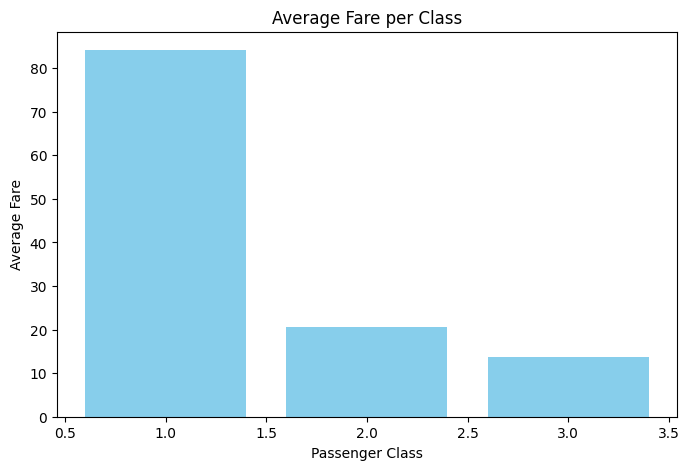

In [ ]:
# Create a bar plot comparing average fare per class

plt.figure(figsize = (8,5))

bars = plt.bar(avg_fare_per_class['Pclass'],avg_fare_per_class['Fare'],color= 'skyblue')
plt.title('Average Fare per Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

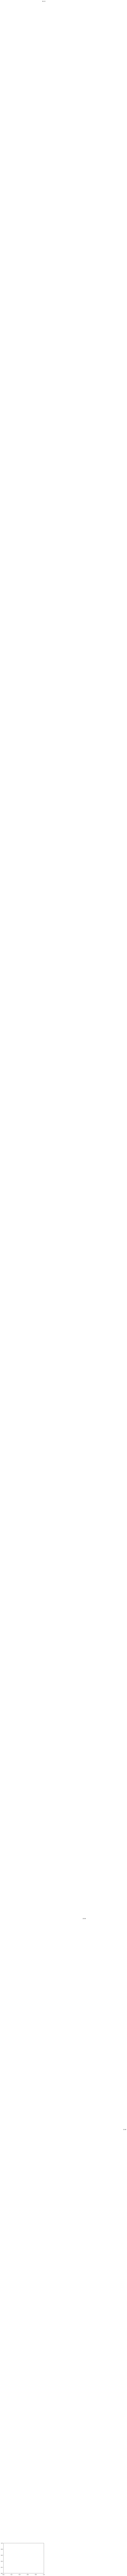

In [ ]:
# Annotate values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.show()

Q5. Build a single dashboard-like figure with 3 different plots (use plt.subplot).

/tmp/ipython-input-612417179.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=df,palette='pastel')


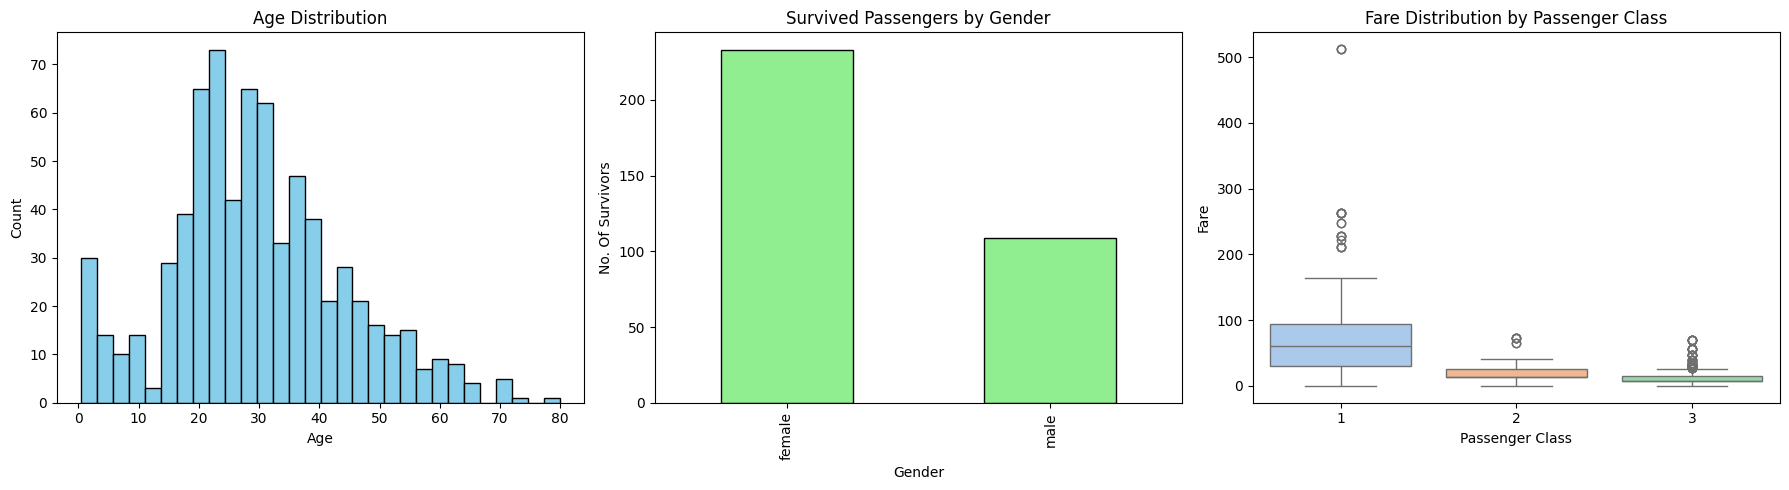

In [ ]:

plt.figure(figsize = (18,5))

# 1. Age Distribution

plt.subplot(1,3,1)
plt.hist(df["Age"].dropna(),bins = 30, color = 'skyblue',edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Survived By Gender

plt.subplot(1,3,2)
survival_gender = df.groupby('Sex')['Survived'].sum()
survival_gender.plot(kind = 'bar',color = 'lightgreen', edgecolor = 'black')
plt.title('Survived Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('No. Of Survivors')

# Fare By Pclass

plt.subplot(1,3,3)
sns.boxplot(x='Pclass',y='Fare',data=df,palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()
